# SPARKS GRIP task #8 Covid Dataset</br>-by **AFZAL QURESHI**

### About dataset:</br>https://github.com/owid/covid-19-data/tree/master/public/data/</br>https://ourworldindata.org/coronavirus-source-data

### **Data cleaning, univariate analysis and filtering of features has been carried out in this notebook.</br>Head over to the link given below for viz in tableau:**
### https://public.tableau.com/app/profile/afzalmp40/viz/sparksgriptask8/Story1

### Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt

### Importing data

In [3]:
df = pd.read_csv('owid-covid-data.csv', parse_dates=['date'])

In [4]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,0.122,0.122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,0.122,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,0.122,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,0.122,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,0.122,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232799 entries, 0 to 232798
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   iso_code                                    232799 non-null  object        
 1   continent                                   219658 non-null  object        
 2   location                                    232799 non-null  object        
 3   date                                        232799 non-null  datetime64[ns]
 4   total_cases                                 219693 non-null  float64       
 5   new_cases                                   219395 non-null  float64       
 6   new_cases_smoothed                          218199 non-null  float64       
 7   total_deaths                                200445 non-null  float64       
 8   new_deaths                                  200370 non-null  float64      

In [6]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

### There are a lot of features so I went through the link below and filtered out the features that I found were most useful
https://github.com/owid/covid-19-data/tree/master/public/data/

# Filtering of columns

In [7]:
cols_to_keep=[
    'continent',
    'location',
    'date',
    'total_cases',
    'new_cases',
    'total_deaths',
    'new_deaths',
    'reproduction_rate',
    'icu_patients',
    'hosp_patients',
    'weekly_icu_admissions',
    'weekly_hosp_admissions',
    'total_tests',
    'positive_rate',
    'tests_per_case',
    'tests_units',
    'total_vaccinations',
    'people_vaccinated',
    'people_fully_vaccinated',
    'total_boosters',
    'new_vaccinations',
    'stringency_index',
    'population_density',
    'median_age',
    'aged_65_older',
    'gdp_per_capita',
    'extreme_poverty',
    'cardiovasc_death_rate',
    'diabetes_prevalence',
    'female_smokers',
    'male_smokers',
    'handwashing_facilities',
    'hospital_beds_per_thousand',
    'life_expectancy',
    'human_development_index',
    'population'
]

In [16]:
df_filtered=df[cols_to_keep].copy()

In [17]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232799 entries, 0 to 232798
Data columns (total 36 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   continent                   219658 non-null  object        
 1   location                    232799 non-null  object        
 2   date                        232799 non-null  datetime64[ns]
 3   total_cases                 219693 non-null  float64       
 4   new_cases                   219395 non-null  float64       
 5   total_deaths                200445 non-null  float64       
 6   new_deaths                  200370 non-null  float64       
 7   reproduction_rate           171567 non-null  float64       
 8   icu_patients                31590 non-null   float64       
 9   hosp_patients               35395 non-null   float64       
 10  weekly_icu_admissions       7901 non-null    float64       
 11  weekly_hosp_admissions      18710 non-n

In [18]:
df_filtered.isnull().sum()

continent                      13141
location                           0
date                               0
total_cases                    13106
new_cases                      13404
total_deaths                   32354
new_deaths                     32429
reproduction_rate              61232
icu_patients                  201209
hosp_patients                 197404
weekly_icu_admissions         224898
weekly_hosp_admissions        214089
total_tests                   153412
positive_rate                 136872
tests_per_case                138451
tests_units                   126011
total_vaccinations            166311
people_vaccinated             169124
people_fully_vaccinated       171825
total_boosters                196304
new_vaccinations              177710
stringency_index               60610
population_density             29476
median_age                     44680
aged_65_older                  46665
gdp_per_capita                 45247
extreme_poverty               110605
c

### There are a lot of missing values in the dataset

### Dropping features which have high missing values 

In [19]:
df_filtered.drop(columns=['weekly_icu_admissions','weekly_hosp_admissions'], axis=1, inplace=True)

In [20]:
df_filtered.head()

,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,reproduction_rate,icu_patients,hosp_patients,total_tests,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,stringency_index,population_density,median_age,aged_65_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population
0,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,54.422,18.6,2.581,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772.0
1,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,54.422,18.6,2.581,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772.0
2,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,54.422,18.6,2.581,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772.0
3,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,54.422,18.6,2.581,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772.0
4,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,54.422,18.6,2.581,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772.0


### Distribution of numerical variables

C:\Users\afzal\AppData\Local\Temp/ipykernel_1420/1327395045.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df_filtered.hist(layout=(8,4), bins=50, ax=ax)


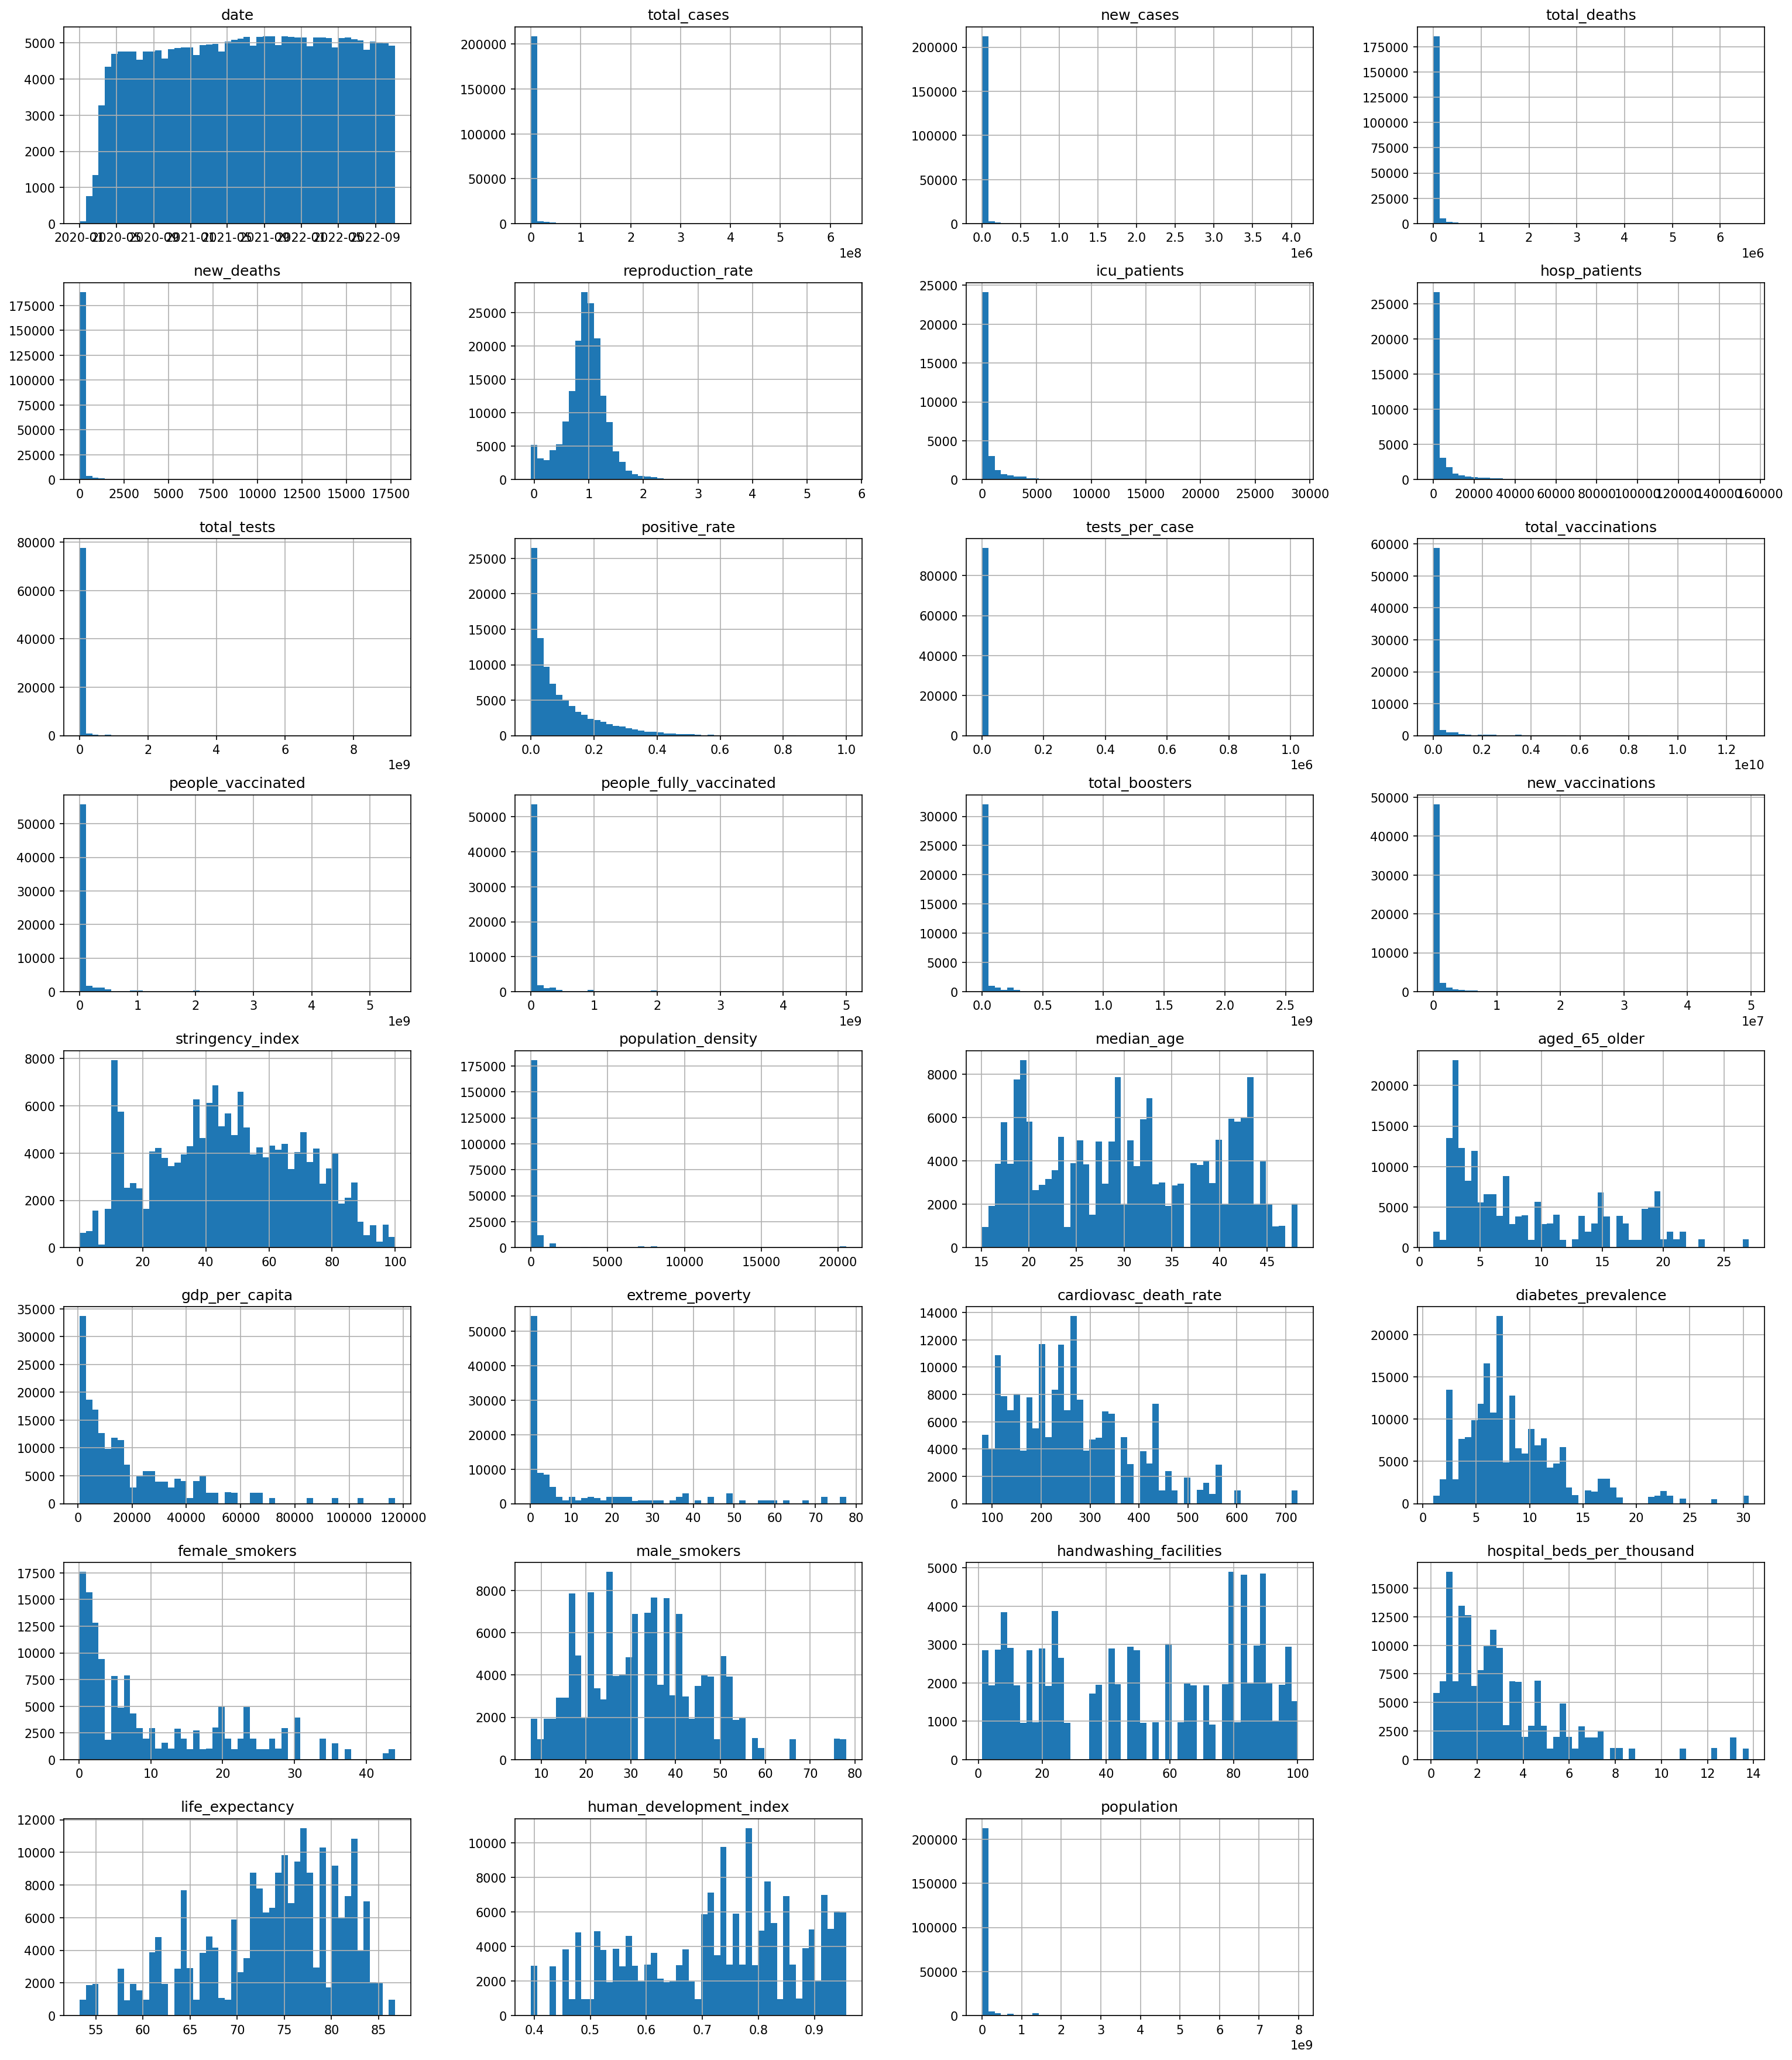

In [21]:
fig, ax = plt.subplots(figsize=(25,30), dpi=150)
df_filtered.hist(layout=(8,4), bins=50, ax=ax)
plt.show()

### Most features have right skewed distribution

### Categorical columns:

In [22]:
for col in df_filtered.select_dtypes('object'):
    print('     ', col,':')
    print(df_filtered[col].value_counts())
    print('---------------')

      continent :
Europe           53285
Africa           52893
Asia             49231
North America    35143
Oceania          16404
South America    12702
Name: continent, dtype: int64
---------------
      location :
Argentina          1040
Mexico             1040
Thailand           1037
Taiwan             1025
High income        1019
                   ... 
Palau               441
Pitcairn            441
Niue                408
Northern Cyprus     317
Western Sahara        1
Name: location, Length: 248, dtype: int64
---------------
      tests_units :
tests performed    80099
people tested      16257
samples tested      9591
units unclear        841
Name: tests_units, dtype: int64
---------------


### Saving the filtered dataset

In [23]:
df_filtered.to_csv('covid_filtered.csv', index=False)

# Now lets Proceed to Tableau for multivariate analysis
### Tableau public link:</br>https://public.tableau.com/app/profile/afzalmp40/viz/sparksgriptask8/Story1